In [51]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [52]:
all_data=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
all_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [53]:
features = ['Close']
eval_data= pd.DataFrame(columns=features, data=all_data, index=all_data.index)
eval_data.head()

,Close
Date,
2000-01-03,170.00
2000-01-04,173.80
2000-01-05,166.95
2000-01-06,168.30
2000-01-07,168.35


(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]), <a list of 8 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

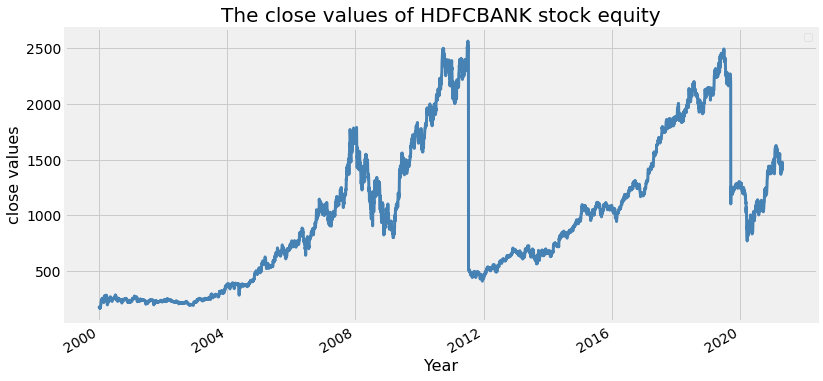

In [54]:
# line plot - the yearly accumulated rainfall in Barcelona
eval_data.plot(color='steelblue', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)

In [55]:
eval_data['SMA_13'] = eval_data['Close'].rolling(13, min_periods=1).mean()

In [56]:
eval_data.head(7)
eval_data.info()

,Close,SMA_13
Date,,
2000-01-03,170.00,170.000000
2000-01-04,173.80,171.900000
2000-01-05,166.95,170.250000
2000-01-06,168.30,169.762500
2000-01-07,168.35,169.480000
2000-01-10,165.90,168.883333
2000-01-11,163.40,168.100000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5306 non-null   float64
 1   SMA_13  5306 non-null   float64
dtypes: float64(2)
memory usage: 124.4 KB


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

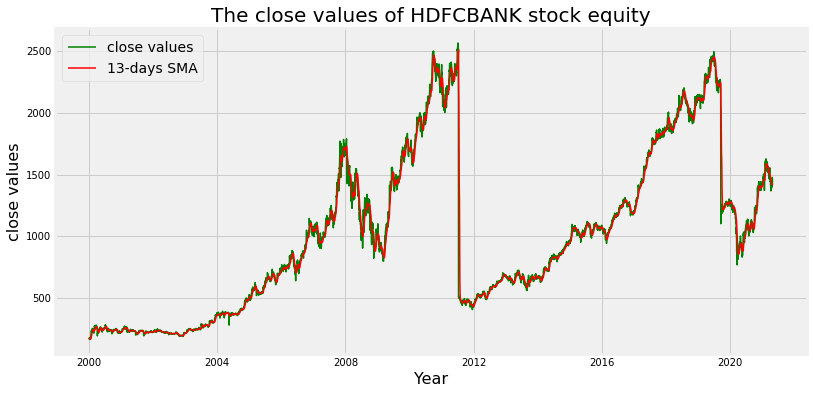

In [57]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['SMA_13'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '13-days SMA'], fontsize=14)
plt.show()

In [59]:
#!pip install pmdarima

In [60]:
import sys
print("python version",sys.version)
import numpy
print("numpy version",numpy.__version__)
import scipy
print("scipy version",scipy.__version__)
import sklearn
print("scikit -learn version",sklearn.__version__)
import pandas
print("pandas version",pandas.__version__)
import statsmodels
print("statsmodels version",statsmodels.__version__)
import pmdarima
print("pyramid version",pmdarima.__version__)
import pip
print("pip version",pip.__version__)

python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version 1.21.6
scipy version 1.4.1
scikit -learn version 1.0.2
pandas version 1.3.5
statsmodels version 0.13.2
pyramid version 1.8.5
pip version 21.1.3


In [61]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from sklearn import metrics
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [62]:
features = ['SMA_13']
df1=eval_data[features]
df1.head()

,SMA_13
Date,
2000-01-03,170.0000
2000-01-04,171.9000
2000-01-05,170.2500
2000-01-06,169.7625
2000-01-07,169.4800


In [63]:
df1.index = pd.to_datetime(df1.index)
df2=df1.resample('1M').mean()
df2.head()

,SMA_13
Date,
2000-01-31,172.359378
2000-02-29,229.747619
2000-03-31,252.567949
2000-04-30,237.468162
2000-05-31,248.818357


In [64]:
df2.head()
df2.tail()
df2.shape
df2.info()
df2.describe()

,SMA_13
Date,
2000-01-31,172.359378
2000-02-29,229.747619
2000-03-31,252.567949
2000-04-30,237.468162
2000-05-31,248.818357


,SMA_13
Date,
2020-12-31,1399.140385
2021-01-31,1437.455000
2021-02-28,1534.854423
2021-03-31,1542.747436
2021-04-30,1449.385425


(256, 1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2000-01-31 to 2021-04-30
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA_13  256 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


,SMA_13
count,256.000000
mean,1007.744641
std,632.115335
min,172.359378
25%,476.259554
50%,949.751841
75%,1437.724583
max,2427.213765


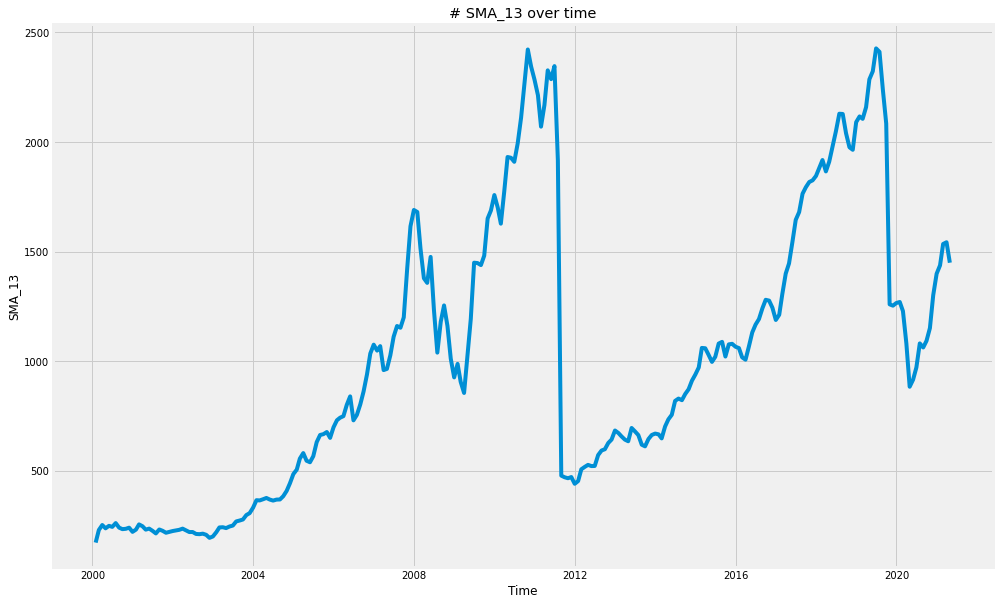

In [65]:
plt.figure(figsize=(15,10))
plt.plot(df2)
plt.xlabel('Time')
plt.ylabel('SMA_13')
plt.title("# SMA_13 over time")
plt.show;

In [66]:
decomposition=seasonal_decompose(df2,model='multiplicative',extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

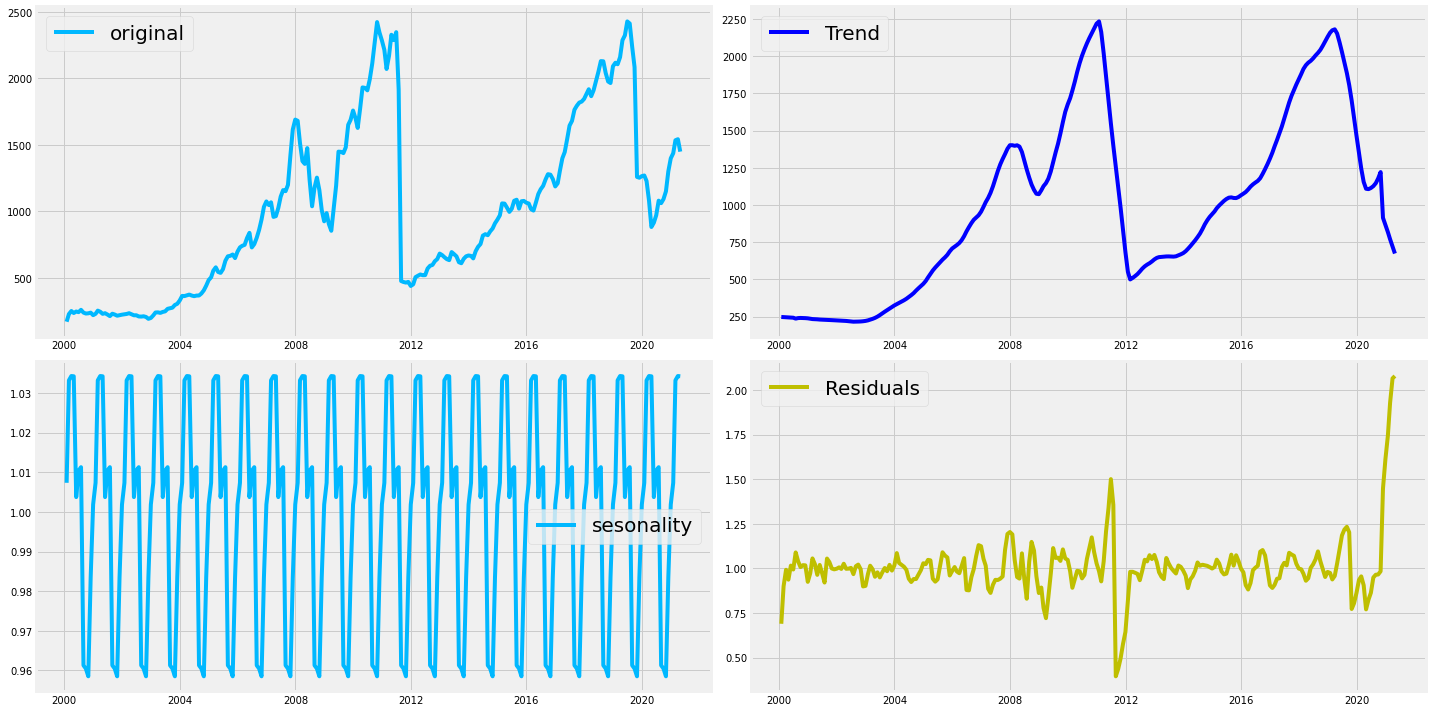

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

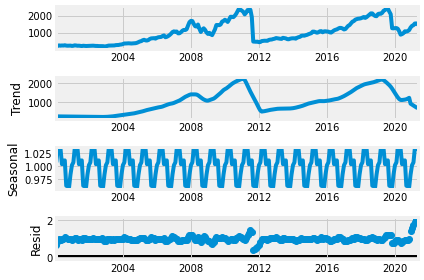

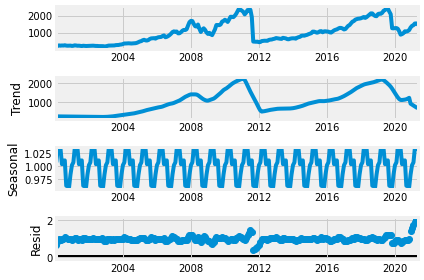

In [68]:
decomposition.plot()

In [69]:
decomposition=seasonal_decompose(df2,model='additive')

<Figure size 1440x720 with 0 Axes>

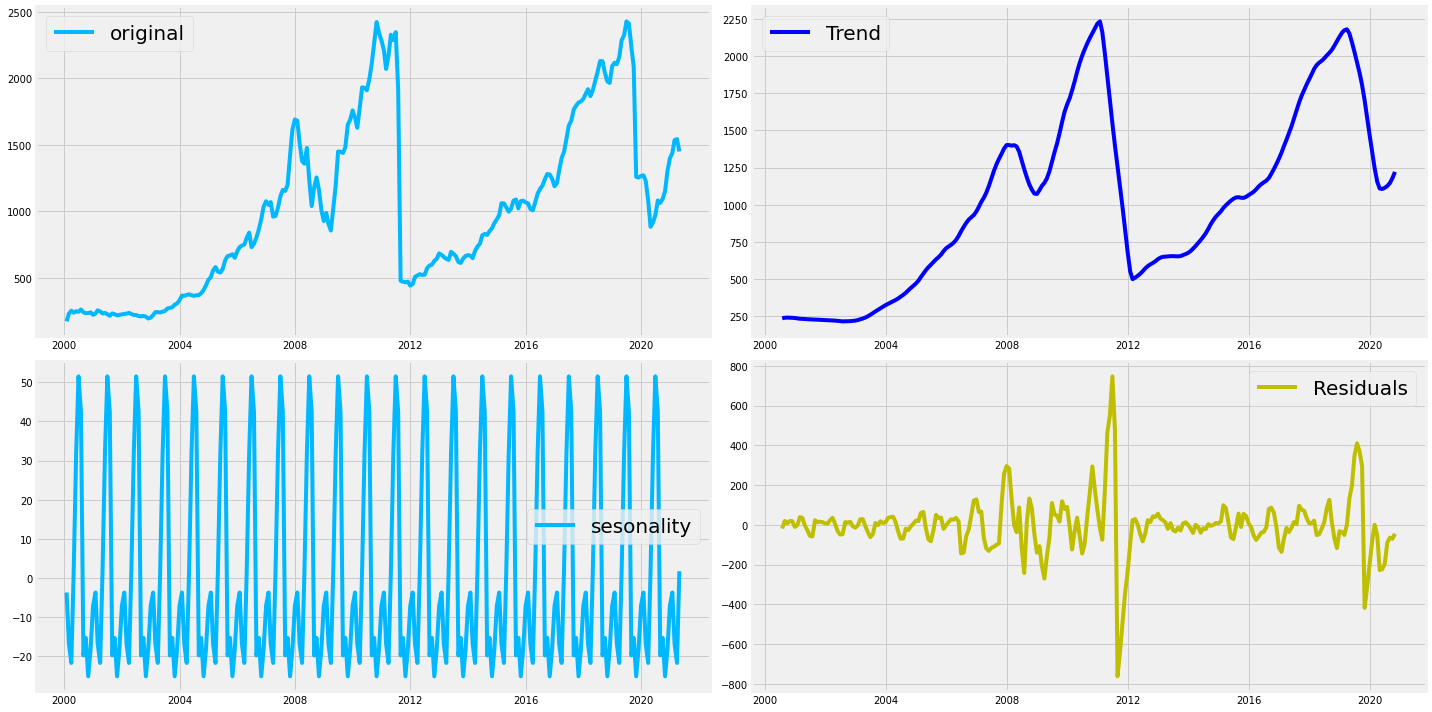

In [70]:
plt.figure(figsize=(20,10))
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

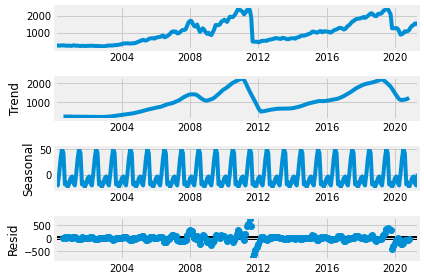

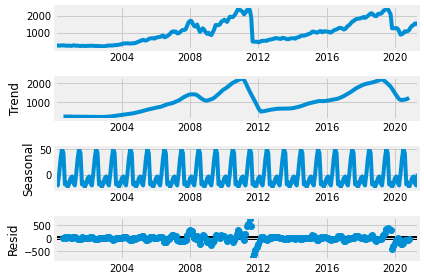

In [71]:
decomposition.plot()

In [72]:
from pmdarima.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff (df2)

(0.16452087863419684, True)

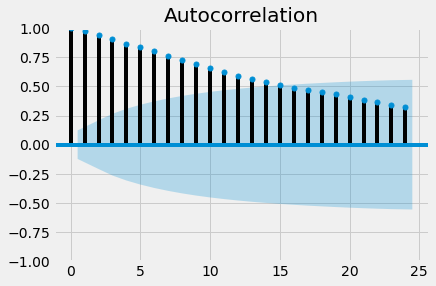

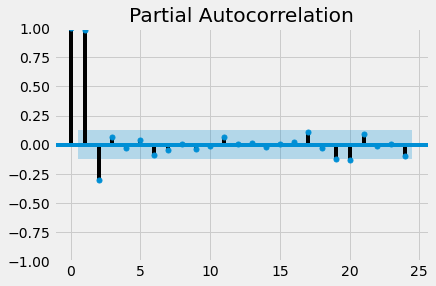

In [73]:
# Loading the packages
import pandas as pd
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df2, lags=24)
plt.show()

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(df2, lags=24)
plt.show()

In [74]:
train,test=df2[:240],df2[240:]
train.shape
test.shape

(240, 1)

(16, 1)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The Train vs Train of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Train Data vs Test Data')

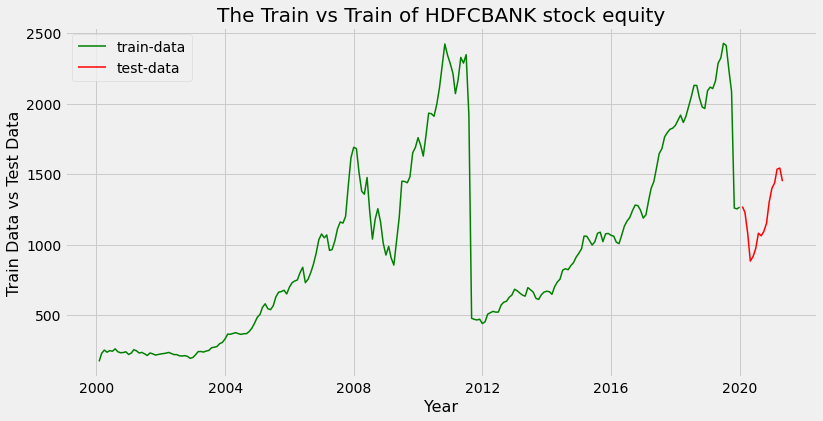

In [75]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The Train vs Train of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Train Data vs Test Data', fontsize=16)
plt.plot(train, color='green',linewidth=1.5)
plt.plot(test,color='red',linewidth=1.5)
plt.legend(labels =['train-data', 'test-data'], fontsize=14)
plt.show()

In [76]:
#fitting a stepwise model:
Arima_model=auto_arima(train,start_p=0,start_q=2,max_p=13,max_q=4,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2986.706, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3005.143, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2988.765, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2986.502, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3003.444, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2984.765, Time=0.25 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2986.476, Time=1.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2988.071, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2986.699, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2986.951, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2987.168, Time=1.05 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2982.945, Time=0.16 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2984.689, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2984.713, Time=0.53 sec
 ARIMA(0,1,1)(1,0,1

In [77]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1489.472
Date:                Tue, 12 Jul 2022   AIC                           2982.945
Time:                        04:14:46   BIC                           2989.898
Sample:                             0   HQIC                          2985.747
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3181      0.025     12.755      0.000       0.269       0.367
sigma2      1.515e+04    345.935     43.798      0.000    1.45e+04    1.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             34560.53
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              18.03   Skew:                            -6.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        60.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction.columns=['Predicted_SMA_13']
prediction

,Predicted_SMA_13
Date,
2020-01-31,1244.513485
2020-02-29,1244.513485
2020-03-31,1244.513485
2020-04-30,1244.513485
2020-05-31,1244.513485
2020-06-30,1244.513485
2020-07-31,1244.513485
2020-08-31,1244.513485
2020-09-30,1244.513485


<Figure size 1080x720 with 0 Axes>

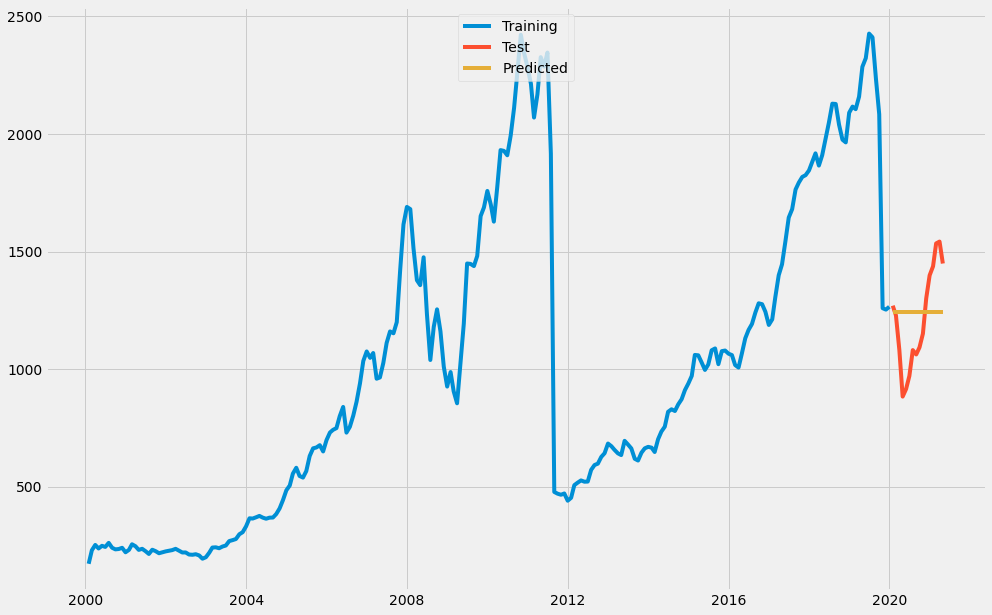

In [79]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [80]:
test['Predicted_SMA_13']=prediction
test['Error']=test['SMA_13']-test['Predicted_SMA_13']
test

,SMA_13,Predicted_SMA_13,Error
Date,,,
2020-01-31,1270.115719,1244.513485,25.602234
2020-02-29,1228.603269,1244.513485,-15.910216
2020-03-31,1081.197253,1244.513485,-163.316232
2020-04-30,883.422863,1244.513485,-361.090622
2020-05-31,915.648785,1244.513485,-328.864700
2020-06-30,971.423427,1244.513485,-273.090059
2020-07-31,1081.165552,1244.513485,-163.347933
2020-08-31,1062.578755,1244.513485,-181.934731
2020-09-30,1092.879545,1244.513485,-151.633940


**STEP6-EVALUATE MODEL PERFORMANCE for SMA_13ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [81]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.SMA_13,test.Predicted_SMA_13),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


184.729

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [82]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.SMA_13,test.Predicted_SMA_13),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


44482.515

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [83]:
import math
math.sqrt(mse)

210.9087836008733

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [84]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.SMA_13,test.Predicted_SMA_13),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


172.641

**Mean Absolute Percentage Error FOR TEST DATA**

In [85]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.SMA_13-test.Predicted_SMA_13)/test.SMA_13))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


16.171

,SMA_13
Date,
2000-01-31,5.149582
2000-02-29,5.436981
2000-03-31,5.531680
2000-04-30,5.470034
2000-05-31,5.516723


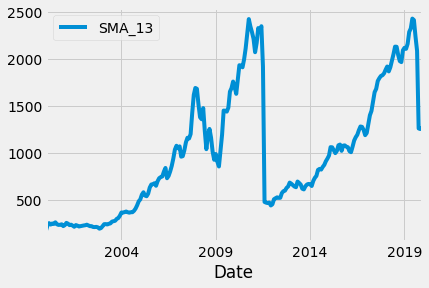

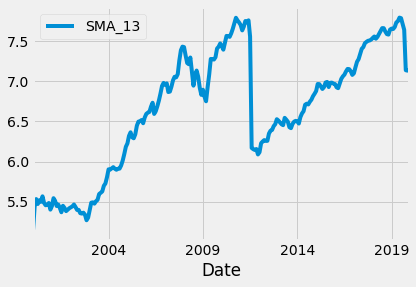

In [86]:
train_log=np.log(train)
train_log.head()
train.plot()
train_log.plot()
plt.show()

In [87]:
#fitting a stepwise model:
Arima_model=auto_arima(train_log,start_p=0,start_q=0,max_p=14,max_q=5,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-357.400, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-363.063, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-363.824, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-358.115, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-365.612, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-363.854, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-362.429, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-363.685, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-363.684, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-364.824, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-361.685, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-366.655, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-364.827, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=-364.805, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1

In [88]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 185.328
Date:                Tue, 12 Jul 2022   AIC                           -366.655
Time:                        04:14:51   BIC                           -359.702
Sample:                             0   HQIC                          -363.854
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2177      0.033      6.676      0.000       0.154       0.282
sigma2         0.0124      0.000     59.020      0.000       0.012       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             83385.51
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -7.76
Prob(H) (two-sided):                  0.27   Kurtosis:                        93.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
prediction_log=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction_log.columns=['Predicted_SMA_13']

In [90]:
prediction_log

,Predicted_SMA_13
Date,
2020-01-31,7.140529
2020-02-29,7.140529
2020-03-31,7.140529
2020-04-30,7.140529
2020-05-31,7.140529
2020-06-30,7.140529
2020-07-31,7.140529
2020-08-31,7.140529
2020-09-30,7.140529


In [91]:
prediction1=np.exp(prediction_log)
prediction1

,Predicted_SMA_13
Date,
2020-01-31,1262.096054
2020-02-29,1262.096054
2020-03-31,1262.096054
2020-04-30,1262.096054
2020-05-31,1262.096054
2020-06-30,1262.096054
2020-07-31,1262.096054
2020-08-31,1262.096054
2020-09-30,1262.096054


In [92]:
test['log_prediction']=prediction1
test['Error_log']=test['SMA_13']-test['log_prediction']
#test=test.drop(['train_log'],axis=1)
test.head()

,SMA_13,Predicted_SMA_13,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1270.115719,1244.513485,25.602234,1262.096054,8.019665
2020-02-29,1228.603269,1244.513485,-15.910216,1262.096054,-33.492785
2020-03-31,1081.197253,1244.513485,-163.316232,1262.096054,-180.898801
2020-04-30,883.422863,1244.513485,-361.090622,1262.096054,-378.673191
2020-05-31,915.648785,1244.513485,-328.864700,1262.096054,-346.447269


**STEP6-EVALUATE MODEL PERFORMANCE for SMA_13ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [93]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.SMA_13,prediction1),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


186.927

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [94]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.SMA_13,prediction1),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


45910.641

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [95]:
import math
math.sqrt(mse)

214.2676853844275

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [96]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.SMA_13,prediction1),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


180.915

**Mean Absolute Percentage Error FOR TEST DATA**

In [97]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.SMA_13-prediction1)/test.SMA_13))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


2020-01-31 00:00:00   NaN
2020-02-29 00:00:00   NaN
2020-03-31 00:00:00   NaN
2020-04-30 00:00:00   NaN
2020-05-31 00:00:00   NaN
2020-06-30 00:00:00   NaN
2020-07-31 00:00:00   NaN
2020-08-31 00:00:00   NaN
2020-09-30 00:00:00   NaN
2020-10-31 00:00:00   NaN
2020-11-30 00:00:00   NaN
2020-12-31 00:00:00   NaN
2021-01-31 00:00:00   NaN
2021-02-28 00:00:00   NaN
2021-03-31 00:00:00   NaN
2021-04-30 00:00:00   NaN
Predicted_SMA_13      NaN
dtype: float64

In [98]:
test.head()

,SMA_13,Predicted_SMA_13,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1270.115719,1244.513485,25.602234,1262.096054,8.019665
2020-02-29,1228.603269,1244.513485,-15.910216,1262.096054,-33.492785
2020-03-31,1081.197253,1244.513485,-163.316232,1262.096054,-180.898801
2020-04-30,883.422863,1244.513485,-361.090622,1262.096054,-378.673191
2020-05-31,915.648785,1244.513485,-328.864700,1262.096054,-346.447269


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

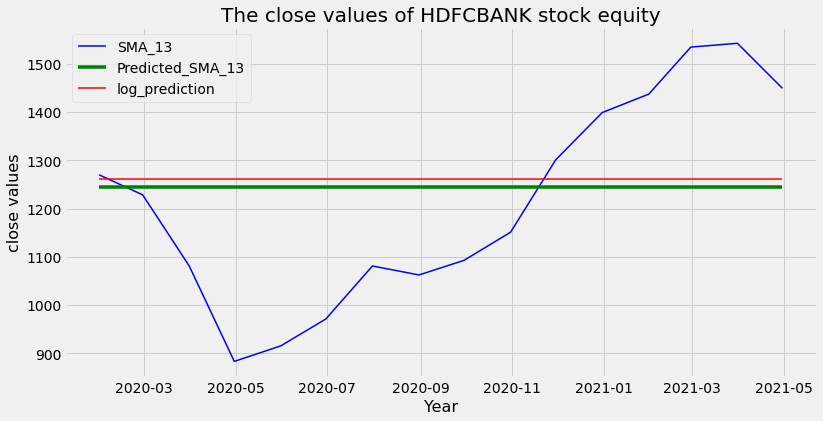

In [99]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(test.index,test['SMA_13'],color='b',linewidth=1.5)
plt.plot(test.index,test['Predicted_SMA_13'],color='g',linewidth=3.5)
plt.plot(test.index,test['log_prediction'],color='r',linewidth=1.5)
plt.legend(labels =['SMA_13', 'Predicted_SMA_13','log_prediction'], fontsize=14)
plt.show()

In [101]:
!jupyter nbconvert SMA_13ARIMA_StockMarketPrediction.ipynb

[NbConvertApp] Converting notebook SMA_13ARIMA_StockMarketPrediction.ipynb to html
[NbConvertApp] Writing 1432547 bytes to SMA_13ARIMA_StockMarketPrediction.html
